# Testing Faster-RCNN for Person Detection

In [1]:
import os
import sys
import json
import collections
from tqdm import tqdm

import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch.nn import DataParallel
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

sys.path.append("..")

from data import StyledCoco
import models
from models.utils.config import opt
from CONFIG import CONFIG
import CONSTANTS
import data
import lib.arguments as arguments
import lib.utils as utils
import lib.metrics as metrics
import lib.pose_parsing as pose_parsing 
import lib.visualizations as visualizations

ModuleNotFoundError: No module named 'lib.bbox'

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
test_exp = "test/experiment_2020-06-04_08-06-38"
test_exp = os.path.join(CONFIG["paths"]["experiments_path"], test_exp)

# Dataset

In [4]:
image_size = 600
exp_data = utils.load_experiment_parameters(test_exp)
exp_data["training"]["batch_size"] = 4
exp_data["dataset"]["dataset_name"] = "coco"
exp_data["dataset"]["image_size"] = image_size
exp_data["model"]["model_name"] = "OpenPose"

In [5]:
_, valid_loader = data.load_dataset(exp_data=exp_data, train=False,
                                    validation=True, shuffle_train=True,
                                    shuffle_valid=False)

_, random_loader = data.load_dataset(exp_data=exp_data, train=False,
                                    validation=True, shuffle_train=True,
                                    shuffle_valid=True)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


# Model

In [6]:
faster_rcnn = models.FasterRCNN()
pretrained_path = os.path.join(CONFIG["paths"]["pretrained_path"], "FasterRCNN", "chainer_best_model_converted_to_pytorch_0.7053.pth")
faster_rcnn = faster_rcnn.load_pretrained(pretrained_path)

In [7]:
faster_rcnn = faster_rcnn.cuda()

# Inference

In [8]:
# iterator = iter(valid_loader)
# for i in range(1):
#     imgs, heatmaps, pafs, mask, metadata = iterator.next()
imgs, heatmaps, pafs, mask, metadata = iter(random_loader).next()

In [9]:
print(f"max: {torch.max(imgs)}")
print(f"min: {torch.min(imgs)}")

max: 0.49609375
min: -0.5


In [10]:
imgs_f = imgs*256 + 128

print(f"max: {torch.max(imgs_f)}")
print(f"min: {torch.min(imgs_f)}")

max: 255.0
min: 0.0


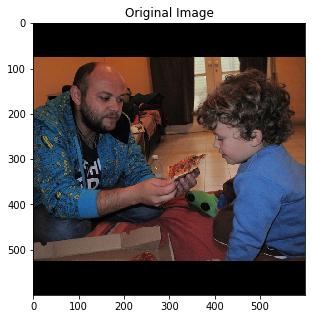

In [11]:
plt.figure(figsize=(6, 5))

ax = plt.gca()
visualizations.visualize_image(np.array(imgs[0,:]), ax=ax, title="Original Image")

In [12]:
bboxes, labels, scores = faster_rcnn.predict(imgs_f, visualize=True)

In [13]:
print(len(bboxes))
print(bboxes[0].shape)

1
(2, 4)


In [14]:
vis_img = np.array(imgs[0,:])

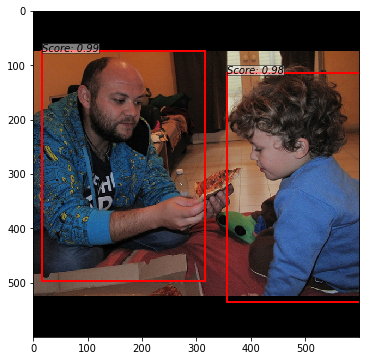

In [15]:
visualizations.visualize_bbox(np.array(imgs[0,:]), bbox=bboxes[0], label=labels[0], score=scores[0], ax=None)
plt.show()

<div class=alert style="background-color:#F5F5F5; border-color:#C8C8C8">
   This notebook was created by <b>Angel Villar-Corrales</b>
</div> 